In [1]:
from qiskit.quantum_info import Statevector, Operator
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
import math
import matplotlib.pyplot as pl
import random

To plot coherence l1 norm (l1), relative entropy(S) and success probability(P) as a funciton of number of iteration(noi) taking the Grover's operator as G = DO

O = ( I-2|ψ⟩⟨ψ| ) and D = ( 2|ψ1⟩⟨ψ1|-I )

l1 norm of coherence is given by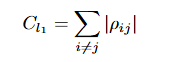

relative entropy is given by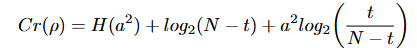 with 

   ;   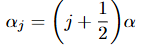   ;   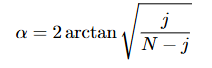   ;   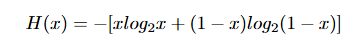   
Success probability is determined by the formula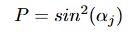
with t = number of target states and j = iteration number

In [15]:
n = 8      #no. of qubits
N = 2**n   #dimension of matrix
t = 4      #no. of target states
length = list(range(n))
noi = 15   #taking same number of iteration for all cases
noi_opt = math.floor(math.sqrt(N/t) * np.pi / 4)   #optimal No of iterations
print("noi = ", noi)
print("Optimal noi = ",noi_opt)

#to set target states by randomly generating them
target = np.zeros(t)    #to store target states
count = 0
flag = 0
i = 0
while(True):
    #to generate a random integer for target position
    a = random.randint(0,N-1)
    
    #checking if that number has already been chosen previously as target state
    for j in range(count):
        if(target[j] == a):
            flag = 1  #value is present in the target array
            
    #to store new value in target array
    if(flag == 0):
        #to store in count position of target array
        target[count] = a
        #updating count (position) value
        count += 1
        #checking for further iteration of while loop
        if(count == t):
            break
print("target = ",target)

phi = [np.pi]    #setting at a particular value
print("phi = ",phi)

x = [complex(np.cos(a), np.sin(a)) for a in phi]
print("x = ",x)

#array to store coherence values after each suboperation in every grover's iteration
l1 = np.zeros(noi)    #to store l1 norm of coherence values after each iteration
S  = np.zeros(noi)    #to store relative entropy values after each iteration
P  = np.zeros(noi)    #to store success probability after each iteration
x_axis = list(range(noi))    #to store iteration number

noi =  15
Optimal noi =  6
target =  [140.  44.  11.   8.]
phi =  [3.141592653589793]
x =  [(-1+1.2246467991473532e-16j)]


In [16]:
def iteration(i,a):
    qc.barrier()
    #count = i*2
    copy_i = i    #storing copy of iteration number
    copy_a = a    #storing copy of phi value
    
    #applying O operator
    qc.append(O_operator,length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied O operator to |ψ2⟩", state.draw('latex'))
    
    #Applying D operator
    qc.append(D_operator,length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied D operator to |ψ2⟩", state.draw('latex'))
    density_operator = state.to_operator()
    
    #calculating coherence by l1 norm
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ2⟩ = ",coherence)
    l1[copy_i] = coherence
    print("l1 norm = ",coherence)
    
    #calculating coherence by relative entropy
    j = copy_i+1   #to store the actual iteration number 
    alpha = 2*np.arctan(np.sqrt(t/(N-t)))
    alpha_j = (j+1/2.0)*alpha    
    a = np.sin(alpha_j)
    a_2 = a**2
    H = -(a_2*math.log2(a_2)+(1-a_2)*math.log2(1-a_2))
    Cr = H+math.log2(N-j)+a_2*math.log2(j/(N-j))
    S[copy_i] = Cr
    print("relative entropy = ",Cr)
    
    #calculating success probability
    P[copy_i] = np.sin(alpha_j)**2
    
for a in range(len(phi)):
    print("======================================== FOR ϕ = ", phi[a]*180/np.pi,"========================================")
    qc = QuantumCircuit(n)
    backend = Aer.get_backend('statevector_simulator')
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("initialised |ψ0⟩", state.draw('latex'))
    density_operator = state.to_operator()
    #print(density_operator.data)
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ0⟩ = ",coherence)

    qc.h(length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied Hadamard to all |ψ1⟩", state.draw('latex'))
    density_operator = state.to_operator()
    #print(density_operator.data)
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ1⟩ = ",coherence)

    #defining generalised O Operator
    count = 0
    choice = a
    O_operator = Operator(np.zeros((N,N)))
    for i in range(N):
        for j in range(N):
            if(i != j):   #off diagonal elements
                O_operator.data[i][j] = 0
            else:    #diagonal elements
                flag = 0
                for k in range(t):
                    if(i == target[k]):
                        O_operator.data[i][j] = x[choice]
                        count += 1
                        flag = 1
                        break
                if(flag == 0):
                    O_operator.data[i][j] = 1            
   
    #defining D operator
    D_operator = Operator(np.zeros((N,N)))
    for i in range(N):
        for j in range(N):
            if(i == j):    #for diagonal elements
                D_operator.data[i][j] = 2*density_operator.data[i][j]-1
            else:          #for off-diagonal elements
                D_operator.data[i][j] = 2*density_operator.data[i][j]
    
    #sending out for x iterations of grover's operator
    for i in range(noi):
        print("--------",(i+1)," ITERATION--------")
        iteration(i,a)    #a takes angle phi and i takes noi

======================================== FOR ϕ =  180.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  239.25
l1 norm =  239.25
relative entropy =  7.487029731423932
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  195.8759765625
l1 norm =  195.8759765625
relative entropy =  6.513807047366417
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  135.55200576782227
l1 norm =  135.55200576782227
relative entropy =  5.175095080296234
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  73.12343980371952
l1 norm =  73.12343980371952
relative entropy =  3.7855049147008337
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  23.953558575420175
l1 norm =  23.953558575420175
relative entropy =  2.7539864531503717
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  7.550739788319239
l1 norm =  7.550739788319239
relative entropy =  2.636229314420814
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  44.35443341540755
l1 norm =  44.35443341540755
relative entropy =  3.729163351307978
-------- 8  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  101.49668444416237
l1 norm =  101.49668444416237
relative entropy =  5.254979670728588
-------- 9  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  164.91514203525898
l1 norm =  164.91514203525898
relative entropy =  6.676913542659602
-------- 10  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  219.00292014132881
l1 norm =  219.00292014132881
relative entropy =  7.63431213722875
-------- 11  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  250.44935461891527
l1 norm =  250.44935461891527
relative entropy =  7.992204934170002
-------- 12  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  251.5156744829174
l1 norm =  251.5156744829174
relative entropy =  7.931505059253521
-------- 13  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  251.5156744832295
l1 norm =  251.5156744832295
relative entropy =  7.999341391264325
-------- 14  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  221.9394650798134
l1 norm =  221.9394650798134
relative entropy =  7.765489450961329
-------- 15  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  168.9992466922071
l1 norm =  168.9992466922071
relative entropy =  7.072215359605937


l1 =  [0.9345703125, 0.7651405334472656, 0.5295000225305557, 0.2856384367332794, 0.09356858818523506, 0.02949507729812203, 0.17325950552893574, 0.39647142361000925, 0.6441997735752304, 0.8554801568020657, 0.9783177914801378, 0.9824831034488961, 0.9824831034501152, 0.8669510354680211, 0.660153307391434]
S_N =  [0.029246209888374734, 0.025444558778775068, 0.020215215157407165, 0.014787128573050132, 0.01075775958261864, 0.010297770759456305, 0.01456704434104679, 0.020527264338783546, 0.02608169352601407, 0.029821531786049803, 0.03121955052410157, 0.030982441637709066, 0.03124742730962627, 0.030333943167817692, 0.02762584124846069]
P =  [1.34826660e-01 3.43895197e-01 5.91380150e-01 8.16377019e-01
 9.63515482e-01 9.96585681e-01 9.07449248e-01 7.18042101e-01
 4.74976156e-01 2.38068423e-01 6.56204138e-02 7.05058424e-05
 5.75501218e-02 2.23913888e-01 4.58220720e-01]


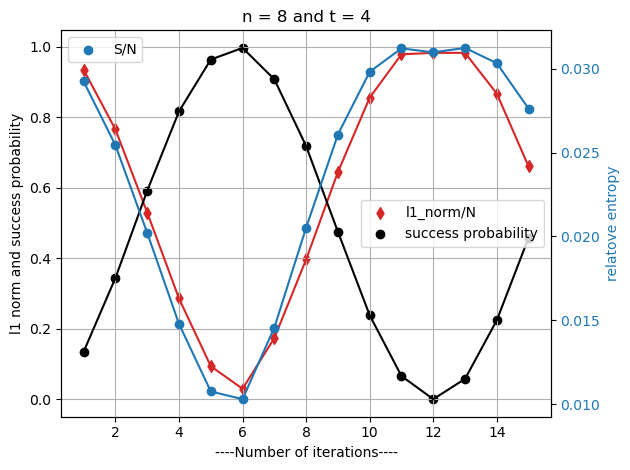

In [17]:
l1_N = [a/N for a in l1]
S_N  = [a/N for a in S]
xa   = [a+1 for a in x_axis]

print("l1 = ",l1_N)
print("S_N = ",S_N)
print("P = ",P)

fig, ax1 = pl.subplots()
pl.title("n = {} and t = {}".format(n, t))
color1 = 'tab:red'
color2 = 'black'
ax1.set_xlabel('----Number of iterations----')
ax1.scatter(xa, l1_N, marker='d', color=color1, label='l1_norm/N')
ax1.plot(xa, l1_N, color=color1)
ax1.scatter(xa, P, color=color2, label='success probability')
ax1.plot(xa, P, color=color2)
pl.legend()
ax1.set_ylabel("l1 norm and success probability")
pl.grid(True)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.scatter(xa, S_N, color=color, label='S/N')
ax2.plot(xa, S_N, color=color)
pl.legend()
ax2.set_ylabel('relatove entropy', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
#pl.grid(True)
pl.show()